# Begin Ray Process

In [2]:
from clases.red_rddas_model import RedRddasModel
import ray
ray.init(num_cpus=4, log_to_driver=False)
# import random  # generate random numbers
# from random import randint  # generate random numbers integers
# from itertools import product  # generate combinations of numbers

RayContext(dashboard_url='', python_version='3.8.10', ray_version='1.13.0', ray_commit='e4ce38d001dbbe09cd21c497fedd03d692b2be3e', address_info={'node_ip_address': '192.168.1.81', 'raylet_ip_address': '192.168.1.81', 'redis_address': None, 'object_store_address': '/tmp/ray/session_2022-06-18_23-23-28_289681_98344/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-06-18_23-23-28_289681_98344/sockets/raylet', 'webui_url': '', 'session_dir': '/tmp/ray/session_2022-06-18_23-23-28_289681_98344', 'metrics_export_port': 64648, 'gcs_address': '192.168.1.81:65240', 'address': '192.168.1.81:65240', 'node_id': '66a2aabf9465633551b47c4a554c8ee4b73131d39fb66f4bce930c53'})

# Read the serial object of the RDDA

In [3]:
path = "files/18_06_2022_6_5_2_2_2.pickle"
path_base = path[:-7]

print("Reading the file: ", path)
oRedRddasModel = RedRddasModel.load_file_pickle(path)

Reading the file:  files/18_06_2022_6_5_2_2_2.pickle


# Show the RDDA information

In [4]:
#Show the RDDA Information
oRedRddasModel.show()

NETWORK RDDA DESCRIPTION
Number of RDDs : 6
Number of variables by RDD : 5
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 6
Maximum number of clauses by function : 6
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2, 3, 4, 5]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 5
Variables : [24, 25]
Name Variable : 31
Coupling Function : 24 ∨ 25
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 3
Variables : [15, 14]
Name Variable : 32
Coupling Function : 15 ∨ 14
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[2]]
V: 2 CNF :[[3], [2]]
V: 3 CNF :[[3, 5]]
V: 4 CNF :[[4]]
V: 5 CNF :[[2, 5, 32]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[6, 7, 8, 9, 10]
List of coupling signals : 
---------------
Network Input : 2
Network Output : 1
Variables : [2, 4]
Nam

# Show the Topology Graph of RDDA

Topology Graph of the RDDA using igraph Library
Show the Topology Graph of the RDDA


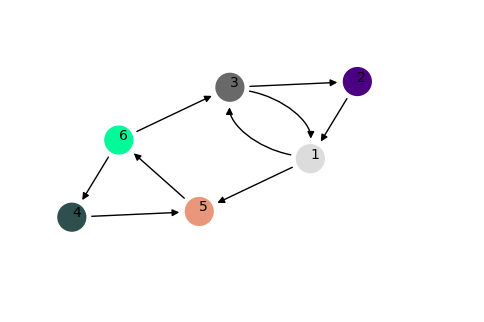

In [5]:
# generate the diagram of the Network RDDA, show and save graph in .eps format
# Show the topology of the RDDA in a graph using the igraph library and save the graph in eps format
print("Topology Graph of the RDDA using igraph Library")
oRedRddasModel.graph_topology_igraph(show_graph=True,save_graph=True,path_graph="")

# Calculate the compatible pairs

In [6]:
# Calculate the Attractors by RDDA and by Signal
result = RedRddasModel.calculation_compatible_pairs.remote(oRedRddasModel)
oRedRddasModel = ray.get(result)

# Assembly the Attractors Field

In [7]:
# import time
# inicio = time.time()
#
# # Calculate the Attractors by RDDA and by Signal with iterative Method
# result = RedRddasModel.assembly_attractor_fields_iterative.remote(oRedRddasModel)
# oRedRddasModel = ray.get(result)
#
# fim = time.time()
# print("Duracion 1:",fim - inicio)

# Assembly the Attractor Fields Optimized

In [8]:
import time
inicio = time.time()

# Calculate the Attractors by RDDA and by Signal with iterative Method
oRedRddasModel = RedRddasModel.assembly_attractor_fields_optimized(oRedRddasModel)

fim = time.time()
print("Duracion 1:",fim - inicio)

OUPUT 158
Duracion 1: 0.37405848503112793


In [9]:
# Show the topology graph using the Networkx library
# oRedRddasModel.graph_topology_networkx(show_graph = True ,save_graph=False,path_graph="")

# Graph the relations between compatible attractor pairs

In [10]:
# # Show the Graph of the attractor pairs
# oRedRddasModel.graph_attractor_pairs(export_graph=True, path=path_base)

# Graph the Attractor Fields

In [11]:
# # Show the Graphs of the attractor fields
# oRedRddasModel.graph_attractor_fields()

# Show the detail of each Attractor Field

In [12]:
# # Show the detail for each attractor field
# oRedRddasModel.show_detail_attractor_fields()

# Examples

In [13]:
# # Relations Between RDDs
# l_relations_rdds = []
# oRedRddasModel.list_of_rddas
# for o_rdd in oRedRddasModel.list_of_rddas:
#     for o_signal in o_rdd.list_of_signals:
#         l_relations_rdds.append([o_signal.rdda_entrada, o_signal.rdda_salida])
# print(l_relations_rdds)

# List of attractors and his RDD
l_attractor_rdd = []
for v_key, v_value in oRedRddasModel.d_global_rdda_attractor.items():
    l_attractor_rdd.append([v_key,v_value[0]])
print("Number of Attractors :", len(l_attractor_rdd))
print("Number of Attractor Fields:", len(oRedRddasModel.attractor_fields))
print("Duracion 1:",fim - inicio)
# #Diferent List of attractors pairs
# oRedRddasModel.group_signals_pairs
# oRedRddasModel.rddas_attractors
# oRedRddasModel.list_signal_pairs

Number of Attractors : 70
Number of Attractor Fields: 158
Duracion 1: 0.37405848503112793


# End Ray Process

In [14]:
# Explicit stop Ray
ray.shutdown()